# Intrusion Detection System using Machine Learning

In the realm of cybersecurity, Intrusion Detection Systems (IDSs) and Intrusion Prevention Systems (IPSs) stand out as pivotal defense tools against the continuously evolving landscape of sophisticated network attacks. The dataset incorporates outcomes from the analysis of network traffic utilizing CICFlowMeter, wherein flows are labeled with information such as timestamps, source and destination IP addresses, source and destination ports, protocols, and indications of potential attacks, all organized in CSV files.

Dataset Source: (https://www.unb.ca/cic/datasets/ids-2017.html):





In [ ]:
!wget http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip # download the dataset

--2023-12-01 20:15:56--  http://205.174.165.80/CICDataset/CIC-IDS-2017/Dataset/MachineLearningCSV.zip
Connecting to 205.174.165.80:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 235102953 (224M) [application/zip]
Saving to: ‘MachineLearningCSV.zip’

MachineLearningCSV. 100%[===================>] 224.21M  1.54MB/s    in 2m 29s  

2023-12-01 20:18:26 (1.50 MB/s) - ‘MachineLearningCSV.zip’ saved [235102953/235102953]



In [ ]:
!unzip '/content/MachineLearningCSV.zip'

Archive:  /content/MachineLearningCSV.zip
   creating: MachineLearningCVE/
  inflating: MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv  
  inflating: MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv  


In [ ]:
# importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import os
import glob
pd.set_option('display.max_columns', None)

# ignore the warning
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# you can replace this path where your files exists
file_path = "/content/MachineLearningCVE"

file_list = glob.glob(f"{file_path}/*.csv")
print(f"There are {len(file_list)} dataset files in this folder")

for i in range(len(file_list)):
    print(f"Dataset file {i+1} : {file_list[i]}")

files = []

for filename in file_list:
    df = pd.read_csv(filename)
    files.append(df) # saving all the data into list

There are 8 dataset files in this folder
Dataset file 1 : /content/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv
Dataset file 2 : /content/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv
Dataset file 3 : /content/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv
Dataset file 4 : /content/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv
Dataset file 5 : /content/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv
Dataset file 6 : /content/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv
Dataset file 7 : /content/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv
Dataset file 8 : /content/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv


In [ ]:
# lets try to check the shape of each dataset
for f in range(len(files)):
    print("{0} ==> rows: ({1}) cols: ({2})".format(file_list[f], files[f].shape[0], files[f].shape[1]))
    print(" ")

/content/MachineLearningCVE/Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv ==> rows: (286467) cols: (79)
 
/content/MachineLearningCVE/Monday-WorkingHours.pcap_ISCX.csv ==> rows: (529918) cols: (79)
 
/content/MachineLearningCVE/Friday-WorkingHours-Afternoon-DDos.pcap_ISCX.csv ==> rows: (225745) cols: (79)
 
/content/MachineLearningCVE/Friday-WorkingHours-Morning.pcap_ISCX.csv ==> rows: (191033) cols: (79)
 
/content/MachineLearningCVE/Thursday-WorkingHours-Morning-WebAttacks.pcap_ISCX.csv ==> rows: (170366) cols: (79)
 
/content/MachineLearningCVE/Wednesday-workingHours.pcap_ISCX.csv ==> rows: (692703) cols: (79)
 
/content/MachineLearningCVE/Tuesday-WorkingHours.pcap_ISCX.csv ==> rows: (445909) cols: (79)
 
/content/MachineLearningCVE/Thursday-WorkingHours-Afternoon-Infilteration.pcap_ISCX.csv ==> rows: (288602) cols: (79)
 


In [ ]:
# lets combine/concat all the 8 files into one file
df = pd.concat([files[0],files[1],files[2],files[3],
               files[4],files[5],files[6],files[7]], axis = 0)

In [ ]:
# lets try to look the first 5 rows
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [ ]:
# lets try to check the shape of data
df.shape

(2830743, 79)

In [ ]:
# check the column names of data
print(df.columns.tolist())

[' Destination Port', ' Flow Duration', ' Total Fwd Packets', ' Total Backward Packets', 'Total Length of Fwd Packets', ' Total Length of Bwd Packets', ' Fwd Packet Length Max', ' Fwd Packet Length Min', ' Fwd Packet Length Mean', ' Fwd Packet Length Std', 'Bwd Packet Length Max', ' Bwd Packet Length Min', ' Bwd Packet Length Mean', ' Bwd Packet Length Std', 'Flow Bytes/s', ' Flow Packets/s', ' Flow IAT Mean', ' Flow IAT Std', ' Flow IAT Max', ' Flow IAT Min', 'Fwd IAT Total', ' Fwd IAT Mean', ' Fwd IAT Std', ' Fwd IAT Max', ' Fwd IAT Min', 'Bwd IAT Total', ' Bwd IAT Mean', ' Bwd IAT Std', ' Bwd IAT Max', ' Bwd IAT Min', 'Fwd PSH Flags', ' Bwd PSH Flags', ' Fwd URG Flags', ' Bwd URG Flags', ' Fwd Header Length', ' Bwd Header Length', 'Fwd Packets/s', ' Bwd Packets/s', ' Min Packet Length', ' Max Packet Length', ' Packet Length Mean', ' Packet Length Std', ' Packet Length Variance', 'FIN Flag Count', ' SYN Flag Count', ' RST Flag Count', ' PSH Flag Count', ' ACK Flag Count', ' URG Flag 

In [ ]:
# lets remove the spaces from the columsn
df.columns = df.columns.str.strip()

In [ ]:
# lets try to check the general information of all columns in dataset
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2830743 entries, 0 to 288601
Data columns (total 79 columns):
 #   Column                       Dtype  
---  ------                       -----  
 0   Destination Port             int64  
 1   Flow Duration                int64  
 2   Total Fwd Packets            int64  
 3   Total Backward Packets       int64  
 4   Total Length of Fwd Packets  int64  
 5   Total Length of Bwd Packets  int64  
 6   Fwd Packet Length Max        int64  
 7   Fwd Packet Length Min        int64  
 8   Fwd Packet Length Mean       float64
 9   Fwd Packet Length Std        float64
 10  Bwd Packet Length Max        int64  
 11  Bwd Packet Length Min        int64  
 12  Bwd Packet Length Mean       float64
 13  Bwd Packet Length Std        float64
 14  Flow Bytes/s                 float64
 15  Flow Packets/s               float64
 16  Flow IAT Mean                float64
 17  Flow IAT Std                 float64
 18  Flow IAT Max                 int64  
 19  F

* From above anaylsis, we all columns data types is numeric except the label.

In [ ]:
# Replace Inf values with NaN if any
df = df.replace([np.inf, -np.inf], np.nan)

In [ ]:
# lets try to check the missing values of each column in a dataset
missing = (df.isnull().mean()) > 0
missing_values_count = df.isnull().sum()[missing]
missing_values_percentage = ((df.isnull().sum() / len(df)) * 100)[missing]

missing_values_info = pd.DataFrame({
    'Missing Count': missing_values_count,
    'Missing Percentage': missing_values_percentage
})
missing_values_info = missing_values_info.sort_values(by='Missing Count', ascending=False)
missing_values_info

,Missing Count,Missing Percentage
Flow Bytes/s,2867,0.101281
Flow Packets/s,2867,0.101281


In [ ]:
# lets try to check the total missing values in the dataset
print("Total Missing Values : ", df.isnull().sum().sum())
print("Missing Value feature: ", df.columns[df.isnull().any()][0])

# lets drop the all null occurence
df = df.dropna()

# lets again check the missing values
print("After Removing Total Missing Values : ", df.isnull().sum().sum())

Total Missing Values :  5734
Missing Value feature:  Flow Bytes/s
After Removing Total Missing Values :  0


In [ ]:
# lets try to check the count of each label
df['Label'].value_counts()

BENIGN                        2271320
DoS Hulk                       230124
PortScan                       158804
DDoS                           128025
DoS GoldenEye                   10293
FTP-Patator                      7935
SSH-Patator                      5897
DoS slowloris                    5796
DoS Slowhttptest                 5499
Bot                              1956
Web Attack � Brute Force         1507
Web Attack � XSS                  652
Infiltration                       36
Web Attack � Sql Injection         21
Heartbleed                         11
Name: Label, dtype: int64

In [ ]:
# replace the irrelevent character
df.loc[df.Label == 'Web Attack � Brute Force', ['Label']] = 'Brute Force'
df.loc[df.Label == 'Web Attack � XSS', ['Label']] = 'XSS'
df.loc[df.Label == 'Web Attack � Sql Injection', ['Label']] = 'Sql Injection'

In [ ]:
df['Label'].value_counts()

BENIGN              2271320
DoS Hulk             230124
PortScan             158804
DDoS                 128025
DoS GoldenEye         10293
FTP-Patator            7935
SSH-Patator            5897
DoS slowloris          5796
DoS Slowhttptest       5499
Bot                    1956
Brute Force            1507
XSS                     652
Infiltration             36
Sql Injection            21
Heartbleed               11
Name: Label, dtype: int64

*
The dataset presents a diverse distribution of cyber attacks, spanning from frequently encountered incidents, such as DoS Hulk, PortScan, DDoS, and DoS GoldenEye, to more uncommon occurrences like Bot, Brute Force, XSS, Infiltration, Sql Injection, and Heartbleed. Notably, certain attacks are highly prevalent, indicating their frequent manifestation, while others, such as Bot, Brute Force, XSS, Infiltration, Sql Injection, and Heartbleed, are infrequent, implying their limited occurrence in the recorded incidents. This distribution highlights the varying frequencies of cyber threats in the dataset, providing valuable insights into the prevalence and rarity of different types of attacks.

In [ ]:
# Now, creates a binary classification scenario by introducing a new column, 'Attack', based on the existing 'Label' column.
# This column differentiates between normal network traffic (labeled as 'BENIGN') and various types of cyber attacks (labeled differently).
# The goal is to transform the multi-class classification task into a binary one, enabling the use of binary classification algorithms to distinguish
# between benign and malicious network activities.
df['Attack'] = np.where(df['Label'] == 'BENIGN', 0, 1)

In [ ]:
def target_distribution(df_final, col):
    plt.figure(figsize=(17, 7))

    plt.subplot(1, 2, 1)

    ax = df_final[col].map({0:'benign', 1:'malicious'}).value_counts().plot(kind = 'bar', color = ['green', 'red'])

    plt.xlabel('Target Category', fontsize=16)
    plt.ylabel('Frequency of Target', fontsize=16)
    plt.xticks(size = 12)
    plt.yticks(size = 12)
    plt.title('Frequency Distribution of Target', fontsize=18)
    for p in ax.patches:
        ax.annotate(str(p.get_height()), (p.get_x() * 1.05, p.get_height() * 1.01), size=15)


    plt.subplot(1,2,2)

    df_final[col].map({0:'benign', 1:'malicious'}).value_counts().plot.pie(explode=[0.02,0.02],autopct='%1.2f%%',shadow=True, colors = ['green', 'red'],
                                        textprops={'fontsize':15, 'color':'white'})
    plt.ylabel('target', fontsize=16)
    plt.title('Proportional Distribution of Target', fontsize=18)
    plt.legend()
    plt.show()

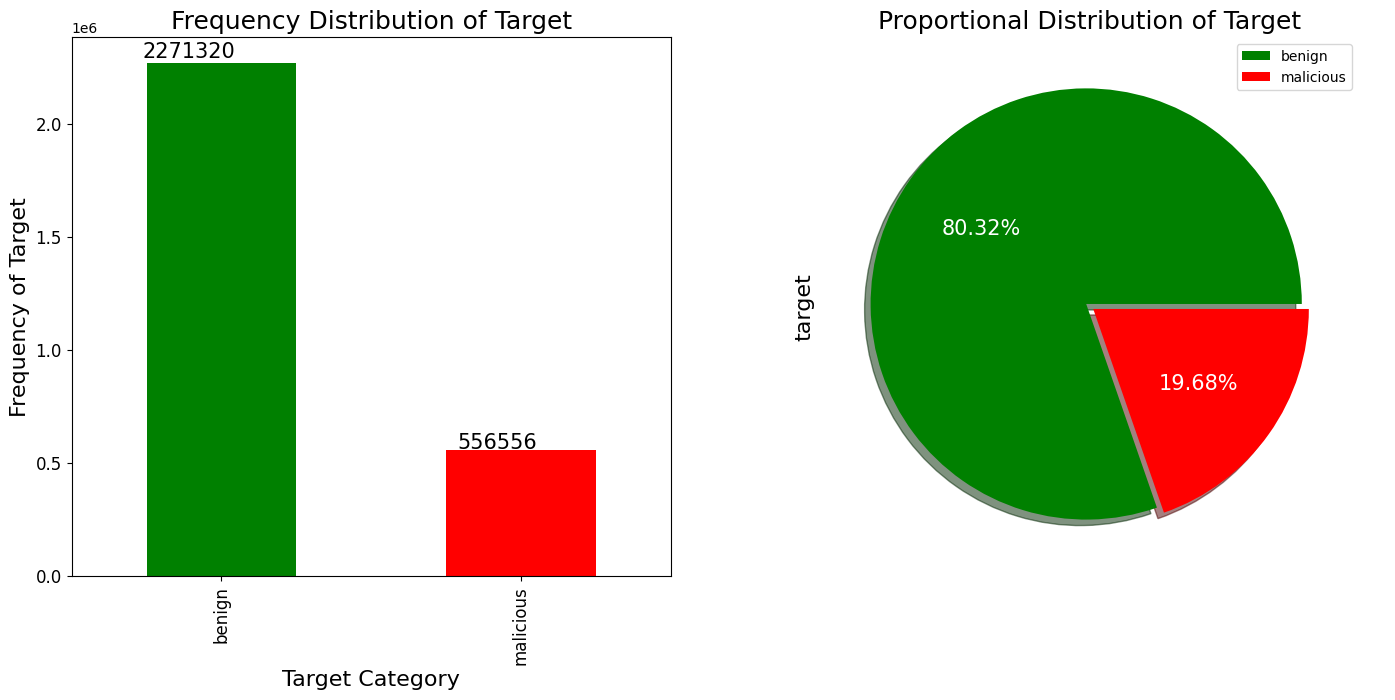

In [ ]:
target_distribution(df, 'Attack')

* From above anaylsis, we can see that the benigh percentage is `80.3%` and other attacks are `19.7%`.

In [ ]:
'''
lets try to check the percentage of missing values,unique values,percentage of one catagory values
and type against each column.

'''
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
print(tabulate(df_, headers = 'keys', tablefmt = 'psql'))

+----+-----------------------------+-----------------+-------------------+------------------------------+---------+
|    | Feature                     |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type    |
|----+-----------------------------+-----------------+-------------------+------------------------------+---------|
|  0 | Destination Port            |           53791 |                 0 |                     33.876   | int64   |
|  1 | Flow Duration               |         1050898 |                 0 |                      3.18957 | int64   |
| 58 | Fwd Avg Bulk Rate           |               1 |                 0 |                    100       | int64   |
| 57 | Fwd Avg Packets/Bulk        |               1 |                 0 |                    100       | int64   |
| 56 | Fwd Avg Bytes/Bulk          |               1 |                 0 |                    100       | int64   |
| 55 | Fwd Header Length.1         |            3771 |                 0

# Models Building

In [ ]:
import time

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

#import for preprocessing
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler,LabelEncoder, MinMaxScaler



# import methods for measuring accuracy, precision, recall etc
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    roc_auc_score,
    f1_score,
    confusion_matrix,
    classification_report
)
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [ ]:
df.head()

,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,Bwd Packet Length Min,Bwd Packet Length Mean,Bwd Packet Length Std,Flow Bytes/s,Flow Packets/s,Flow IAT Mean,Flow IAT Std,Flow IAT Max,Flow IAT Min,Fwd IAT Total,Fwd IAT Mean,Fwd IAT Std,Fwd IAT Max,Fwd IAT Min,Bwd IAT Total,Bwd IAT Mean,Bwd IAT Std,Bwd IAT Max,Bwd IAT Min,Fwd PSH Flags,Bwd PSH Flags,Fwd URG Flags,Bwd URG Flags,Fwd Header Length,Bwd Header Length,Fwd Packets/s,Bwd Packets/s,Min Packet Length,Max Packet Length,Packet Length Mean,Packet Length Std,Packet Length Variance,FIN Flag Count,SYN Flag Count,RST Flag Count,PSH Flag Count,ACK Flag Count,URG Flag Count,CWE Flag Count,ECE Flag Count,Down/Up Ratio,Average Packet Size,Avg Fwd Segment Size,Avg Bwd Segment Size,Fwd Header Length.1,Fwd Avg Bytes/Bulk,Fwd Avg Packets/Bulk,Fwd Avg Bulk Rate,Bwd Avg Bytes/Bulk,Bwd Avg Packets/Bulk,Bwd Avg Bulk Rate,Subflow Fwd Packets,Subflow Fwd Bytes,Subflow Bwd Packets,Subflow Bwd Bytes,Init_Win_bytes_forward,Init_Win_bytes_backward,act_data_pkt_fwd,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label,Attack
0,22,1266342,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7595.104640,67.122468,15075.50000,104051.399700,948537,0,1266342,31658.550,159355.2595,996324,2,317671,7387.697674,19636.44809,104616,1,0,0,0,0,1328,1424,32.376720,34.745748,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
1,22,1319353,41,44,2664,6954,456,0,64.975610,109.864573,976,0,158.045455,312.675250,7289.936810,64.425518,15706.58333,104861.870100,955790,1,1319353,32983.825,159247.9008,996423,1,363429,8451.837209,21337.26261,104815,1,0,0,0,0,1328,1424,31.075838,33.349680,0,976,111.837209,239.686848,57449.78495,0,0,0,1,0,0,0,0,1,113.152941,64.975610,158.045455,1328,0,0,0,0,0,0,41,2664,44,6954,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
2,22,160,1,1,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,12500.000000,160.00000,0.000000,160,160,0,0.000,0.0000,0,0,0,0.000000,0.00000,0,0,0,0,0,0,32,32,6250.000000,6250.000000,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,1,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,1,0,290,243,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
3,22,1303488,41,42,2728,6634,456,0,66.536585,110.129945,976,0,157.952381,319.121427,7182.267884,63.675308,15896.19512,106554.899000,956551,0,1303488,32587.200,160397.0499,997357,1,346851,8459.780488,23962.23892,138295,0,0,0,0,0,1328,1360,31.454068,32.221240,0,976,111.452381,241.642791,58391.23867,0,0,0,1,0,0,0,0,1,112.795181,66.536585,157.952381,1328,0,0,0,0,0,0,41,2728,42,6634,29200,243,24,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0
4,35396,77,1,2,0,0,0,0,0.000000,0.000000,0,0,0.000000,0.000000,0.000000,38961.038960,38.50000,14.849242,49,28,0,0.000,0.0000,0,0,49,49.000000,0.00000,49,49,0,0,0,0,32,64,12987.012990,25974.025970,0,0,0.000000,0.000000,0.00000,0,0,0,0,1,1,0,0,2,0.000000,0.000000,0.000000,32,0,0,0,0,0,0,1,0,2,0,243,290,0,32,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN,0


In [ ]:
# lets extract the dependent and independent features
X = df.drop(['Label', 'Attack'], axis=1)
y = df['Attack']

### Spliting Dataset


* We will split the dataset into 3 sets.
* 20% for Validation.
* 20% for Testing.
* 60% for Training.

In [ ]:
# lets split the dataset stratified
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=0, stratify=y)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0, stratify=y_temp)

In [ ]:
# lets try to check the shape of training,testing  and validation
print("training shape :",X_train.shape)
print("testing shape :", X_test.shape)
print("validation shape :", X_val.shape)

training shape : (1696725, 78)
testing shape : (565575, 78)
validation shape : (565576, 78)


In [ ]:
# lets remove the features which has only one category value because that are not good for model predictiom
stats = []
for col in X_train.columns:
    stats.append((col, X_train[col].nunique(), X_train[col].isnull().sum() * 100 / X_train.shape[0], X_train[col].value_counts(normalize=True, dropna=False).values[0] * 100, X_train[col].dtype))
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', '% MissingValues', '% highOneCategoricalValues', 'type'])
df_ = stats_df.sort_values('% MissingValues', ascending=False)
one_category_value = df_[df_['% highOneCategoricalValues']==100]
print(tabulate(one_category_value, headers = 'keys', tablefmt = 'psql'))

+----+----------------------+-----------------+-------------------+------------------------------+--------+
|    | Feature              |   Unique_values |   % MissingValues |   % highOneCategoricalValues | type   |
|----+----------------------+-----------------+-------------------+------------------------------+--------|
| 56 | Fwd Avg Bytes/Bulk   |               1 |                 0 |                          100 | int64  |
| 58 | Fwd Avg Bulk Rate    |               1 |                 0 |                          100 | int64  |
| 57 | Fwd Avg Packets/Bulk |               1 |                 0 |                          100 | int64  |
| 59 | Bwd Avg Bytes/Bulk   |               1 |                 0 |                          100 | int64  |
| 60 | Bwd Avg Packets/Bulk |               1 |                 0 |                          100 | int64  |
| 61 | Bwd Avg Bulk Rate    |               1 |                 0 |                          100 | int64  |
| 33 | Bwd URG Flags        

In [ ]:
drop_features = one_category_value['Feature'].tolist()
drop_features

['Fwd Avg Bytes/Bulk',
 'Fwd Avg Bulk Rate',
 'Fwd Avg Packets/Bulk',
 'Bwd Avg Bytes/Bulk',
 'Bwd Avg Packets/Bulk',
 'Bwd Avg Bulk Rate',
 'Bwd URG Flags',
 'Bwd PSH Flags']

In [ ]:
import random
random.seed(42)
np.random.seed(42)

In [ ]:
# lets drop the features
X_train = X_train.drop(drop_features, axis=1)
X_val = X_val.drop(drop_features, axis=1)
X_test = X_test.drop(drop_features, axis=1)
df_copy = df.drop(drop_features, axis=1)

### Normalize the Data

In [ ]:
'''
Feature scaling marks the end of the data preprocessing in Machine Learning. It is a method to standardize the independent variables of a dataset within a specific range.
In other words, feature scaling limits the range of variables so that you can compare them on common grounds.

'''

min_max_scaler = MinMaxScaler()

X_train_std = min_max_scaler.fit_transform(X_train)
X_val_std = min_max_scaler.transform(X_val)
X_test_std = min_max_scaler.transform(X_test)

## **Biostatistics Test**

### **Feature Selection chi2**
  *  The chi-squared (chi2) test for feature selection plays a crucial role in identifying the most meaningful features by evaluating the independence between a feature and the target variable. Through this statistical approach, features are ranked according to their relevance to the target, enabling the selection of the most impactful ones for training a model. This method is particularly valuable in situations where the goal is to discern which features contribute the most to the differentiation of classes in a classification problem.

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

In [ ]:
features = SelectKBest(score_func=chi2, k=X_train_std.shape[1])

# fit features to the training dataset
fit = features.fit(X_train_std, y_train)

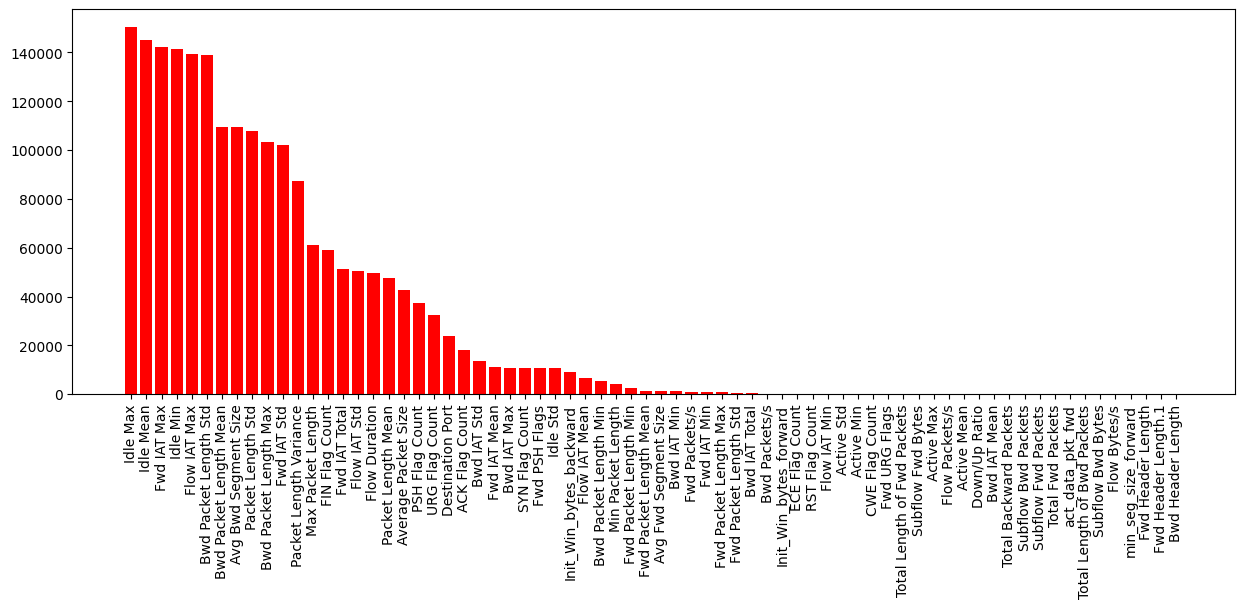

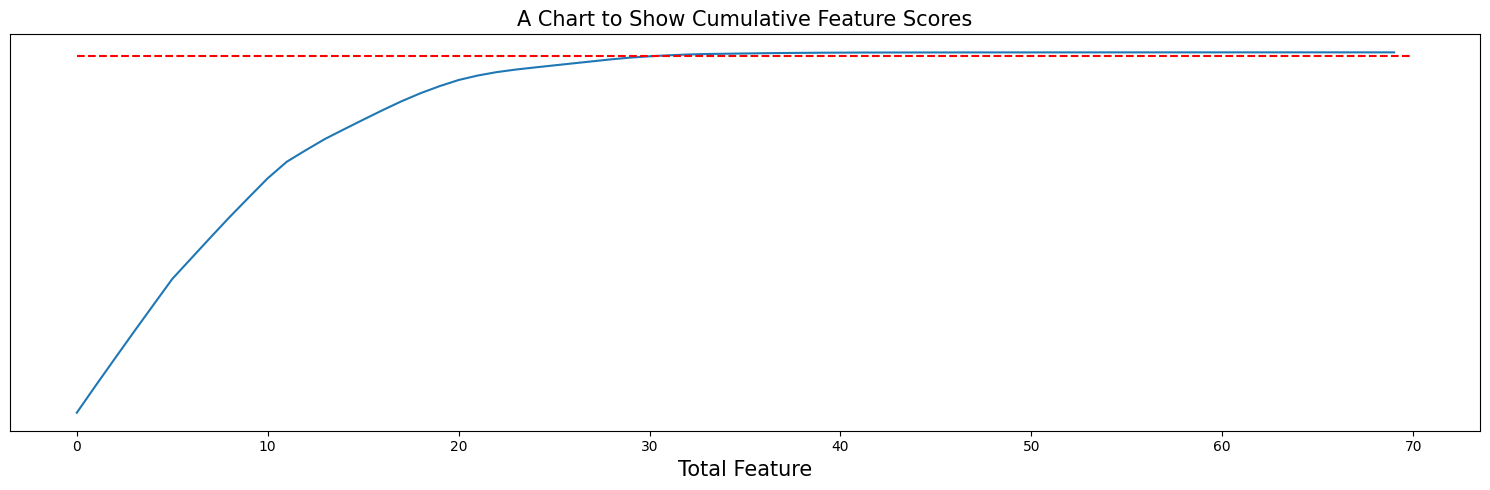

In [ ]:
# Get the indices sorted by most important to least important
indices = np.argsort(fit.scores_)[::-1]

# To get feature names
features_ = []
for i in range(len(X_train.columns.tolist())):
    features_.append(X_train.columns[indices[i]])

# Now plot
plt.figure(figsize=(15,5))
plt.bar(features_, fit.scores_[indices], color='r', align='center')
plt.xticks(rotation=90)
plt.show()

# sort the features by importance score
feature_importances = zip(X_train.columns, features.scores_)
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
sorted_importances = [importance[1] for importance in feature_importances]
sorted_features = [importance[0] for importance in feature_importances]

x_values = list(range(len(feature_importances)))

# plot the cumulative scores
cumulative_importances = np.cumsum(sorted_importances)
plt.figure(figsize=(15, 5))
plt.plot(x_values, cumulative_importances)

# Draw line at 99% of importance retained
value99 = cumulative_importances[-1]*0.99

plt.hlines(y = value99, xmin=0, xmax=len(sorted_importances), color = 'r', linestyles = 'dashed')
# plt.vlines(x = value99, ymin=0, max=len(sorted_importances), color = 'r', linestyles = 'dashed')

# plt.xticks(x_values, sorted_features, rotation = 'vertical', fontsize=5)
plt.yticks([], [])
plt.xlabel('Total Feature', fontsize=15)
plt.title('A Chart to Show Cumulative Feature Scores', fontsize=15)
plt.tight_layout()
plt.savefig('cum_features_CHI2.png', dpi=300)
plt.show()

* From above anaylsis graph, we can see that almost first 40 features contained the 99% features information.
* Now, we will use the K value 40.

In [ ]:
# lets get the 40 features
features = SelectKBest(score_func=chi2, k=40)
fit = features.fit(X_train_std, y_train)
X_train= fit.transform(X_train_std)
X_test = fit.transform(X_test_std)
X_val = fit.transform(X_val_std)

In [ ]:
# lets check the 40 features that we will used for train the model
new_features = X.columns[features.get_support(indices=True)]
new_features = pd.DataFrame(new_features.tolist(), columns=['Best Features'])
print(tabulate(new_features, headers = 'keys', tablefmt = 'psql'))

+----+-------------------------+
|    | Best Features           |
|----+-------------------------|
|  0 | Destination Port        |
|  1 | Flow Duration           |
|  2 | Fwd Packet Length Max   |
|  3 | Fwd Packet Length Min   |
|  4 | Fwd Packet Length Mean  |
|  5 | Bwd Packet Length Max   |
|  6 | Bwd Packet Length Min   |
|  7 | Bwd Packet Length Mean  |
|  8 | Bwd Packet Length Std   |
|  9 | Flow IAT Mean           |
| 10 | Flow IAT Std            |
| 11 | Flow IAT Max            |
| 12 | Fwd IAT Total           |
| 13 | Fwd IAT Mean            |
| 14 | Fwd IAT Std             |
| 15 | Fwd IAT Max             |
| 16 | Fwd IAT Min             |
| 17 | Bwd IAT Std             |
| 18 | Bwd IAT Max             |
| 19 | Bwd IAT Min             |
| 20 | Fwd PSH Flags           |
| 21 | Fwd Header Length       |
| 22 | Fwd Packets/s           |
| 23 | Bwd Packets/s           |
| 24 | Min Packet Length       |
| 25 | Max Packet Length       |
| 26 | Packet Length Mean      |
| 27 | Pac

In [ ]:
# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import time
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

In [ ]:
def results(model, y_pred, y_test,y_pred_train,y_train, classes, multi_class=False):
    if multi_class:
        accuracy = round(accuracy_score(y_pred, y_test)*100,2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,2)
        precision = round(precision_score(y_pred, y_test, average='macro')*100,2)
        recall = round(recall_score(y_pred, y_test, average='macro')*100,2)
        f1_scr = round(f1_score(y_pred, y_test, average='macro')*100,2)
    else:
        accuracy = round(accuracy_score(y_pred, y_test)*100,2)
        train_accuracy = round(accuracy_score(y_pred_train, y_train)*100,2)
        precision = round(precision_score(y_pred, y_test)*100,2)
        recall = round(recall_score(y_pred, y_test)*100,2)
        f1_scr = round(f1_score(y_pred, y_test)*100,2)

    # lets plot the ROC AUC curve
    y_score = model.predict_proba(X_val)
    fpr, tpr, th = roc_curve(y_test, y_score[:,1])

    roc_auc = auc(fpr, tpr)


    print("\nTraining Accuracy: {}%".format(train_accuracy))
    print("Testing Accuracy: {}%".format(accuracy))
    print("Precision: {}%".format(precision))
    print("Recall: {}%".format(recall))
    print("F1-Score: {}%".format(f1_scr))
    print("ROC-AUC Score: {}%".format(roc_auc))
    print()
    print("Classification Report:")
    print(classification_report(y_pred, y_test, target_names=classes))
    print()
    print("Confusion Matrix:")
    fig, ax = plt.subplots(figsize=(7,5))
    ConfusionMatrixDisplay.from_predictions(y_pred, y_test,
                                            ax=ax,
                                            display_labels=classes,
                                            xticks_rotation='vertical')
    plt.show()


    plt.figure(figsize=(7,5))

    plt.plot(fpr, tpr)
    plt.title(f"ROC AUC curve ({model.__class__.__name__})", fontsize=12)
    plt.plot([0,1], [0,1], 'k--')
    plt.xlabel('False Positive Rate', fontsize=12)
    plt.ylabel('True Positive Rate', fontsize=12)

    plt.tick_params(axis='both', which='major', labelsize=12)
    plt.show()

    return {
        'Model':model.__class__.__name__,
        'Training Accuracy': train_accuracy,
        'Testing Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1': f1_scr,
        'ROC AUC Score':roc_auc
    }

In [ ]:
def train_model(model,X_train,y_train,X_test,y_test, labelEncoder, multi_class=None):
    # Record the start time
    start_time = time.time()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Record the end time
    end_time = time.time()

    # Compute the training time in seconds
    training_time = end_time - start_time
    print(f"Training time: {training_time:.3f} seconds")

    # predict the model on testing data
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)


    # get results
    RESULTS_LR = results(model, y_pred, y_test,y_pred_train, y_train, labelEncoder, multi_class)

    # Add the training time to RESULTS_LR
    RESULTS_LR['Training time (s)'] = training_time

    return RESULTS_LR, model

In [ ]:
def get_model_results(res):
  # Convert the dictionary to a DataFrame
  return pd.DataFrame.from_dict([res]).set_index('Model')

In [ ]:
classes = ['benign', 'malicious']

### LogisticRegression

Training time: 16.479 seconds

Training Accuracy: 92.45%
Testing Accuracy: 92.47%
Precision: 76.19%
Recall: 84.08%
F1-Score: 79.94%
ROC-AUC Score: 0.9717591487705246%

Classification Report:
              precision    recall  f1-score   support

      benign       0.96      0.94      0.95    464708
   malicious       0.76      0.84      0.80    100868

    accuracy                           0.92    565576
   macro avg       0.86      0.89      0.88    565576
weighted avg       0.93      0.92      0.93    565576


Confusion Matrix:


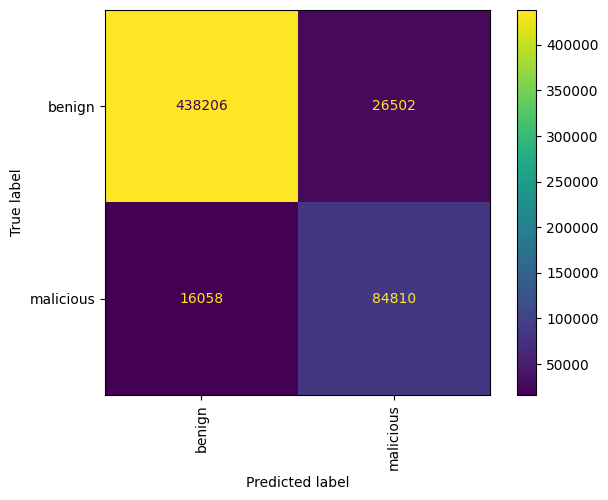

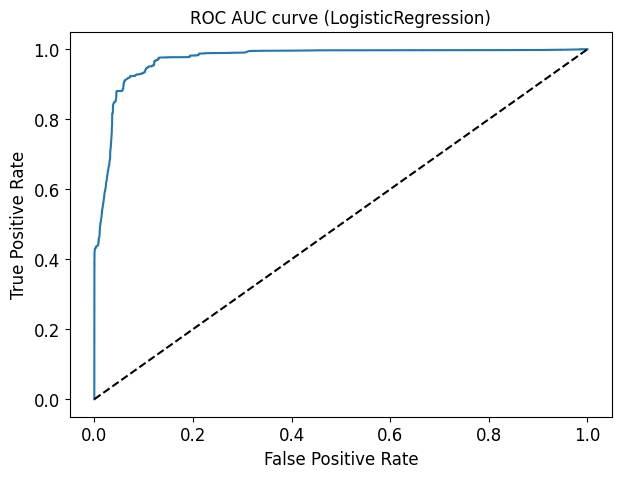

In [ ]:
model = LogisticRegression()
res, model = train_model(model,X_train,y_train,X_val,y_val, classes)
lr_res = get_model_results(res)

### DecisionTreeClassifier

Training time: 16.437 seconds

Training Accuracy: 98.29%
Testing Accuracy: 98.31%
Precision: 96.39%
Recall: 95.08%
F1-Score: 95.73%
ROC-AUC Score: 0.9896936357007641%

Classification Report:
              precision    recall  f1-score   support

      benign       0.99      0.99      0.99    452724
   malicious       0.96      0.95      0.96    112852

    accuracy                           0.98    565576
   macro avg       0.98      0.97      0.97    565576
weighted avg       0.98      0.98      0.98    565576


Confusion Matrix:


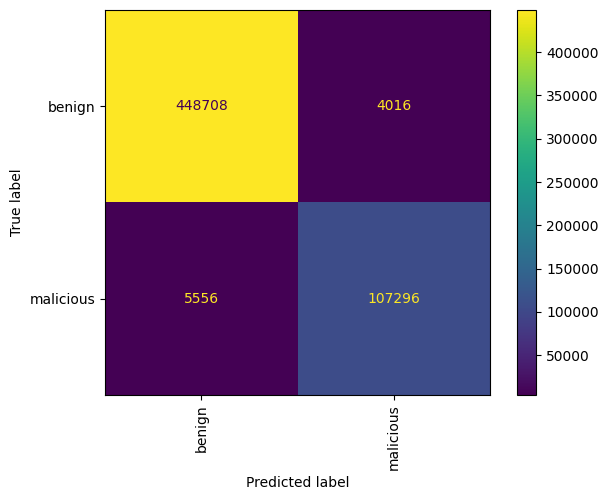

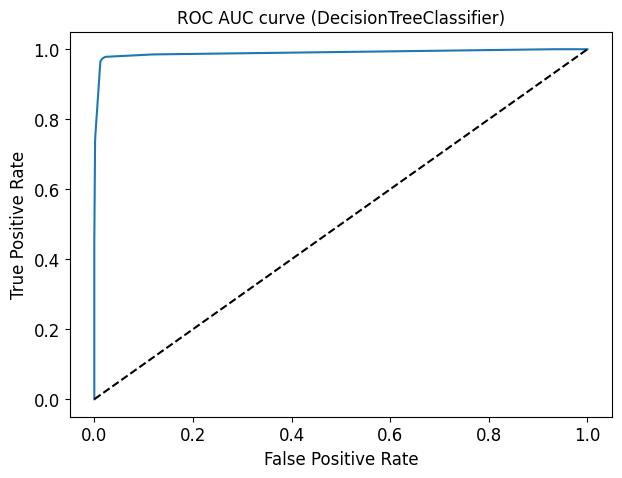

In [ ]:
model = DecisionTreeClassifier(criterion='gini',
                              max_depth=5 ,
                              min_samples_split=10,
                              min_samples_leaf=22,
                             )
res, model = train_model(model,X_train,y_train,X_val,y_val, classes)
dt_res = get_model_results(res)

### Gaussian Navie Bayes

Training time: 1.297 seconds

Training Accuracy: 83.49%
Testing Accuracy: 83.47%
Precision: 46.76%
Recall: 60.34%
F1-Score: 52.69%
ROC-AUC Score: 0.8721182045790873%

Classification Report:
              precision    recall  f1-score   support

      benign       0.92      0.88      0.90    479315
   malicious       0.47      0.60      0.53     86261

    accuracy                           0.83    565576
   macro avg       0.70      0.74      0.71    565576
weighted avg       0.85      0.83      0.84    565576


Confusion Matrix:


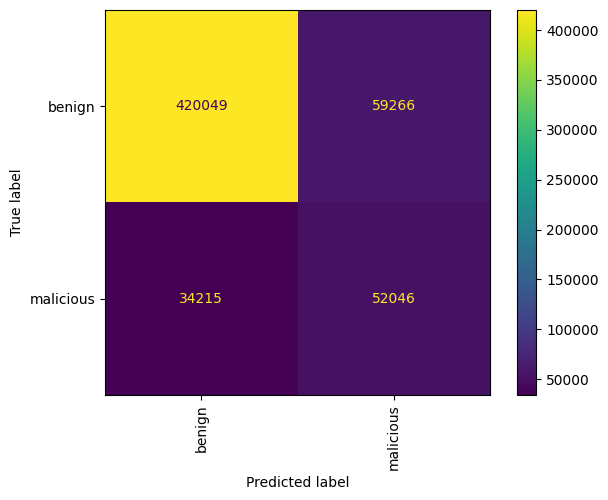

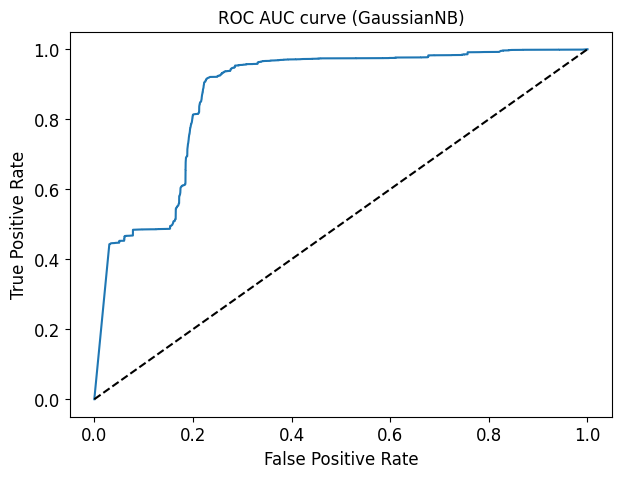

In [ ]:
model = GaussianNB()
res, model = train_model(model,X_train,y_train,X_val,y_val, classes)
nb_res = get_model_results(res)

### Hybrid Model

Training time: 792.851 seconds

Training Accuracy: 99.65%
Testing Accuracy: 99.63%
Precision: 98.73%
Recall: 99.4%
F1-Score: 99.06%
ROC-AUC Score: 0.9995419188320644%

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      1.00      1.00    455013
   malicious       0.99      0.99      0.99    110563

    accuracy                           1.00    565576
   macro avg       0.99      1.00      0.99    565576
weighted avg       1.00      1.00      1.00    565576


Confusion Matrix:


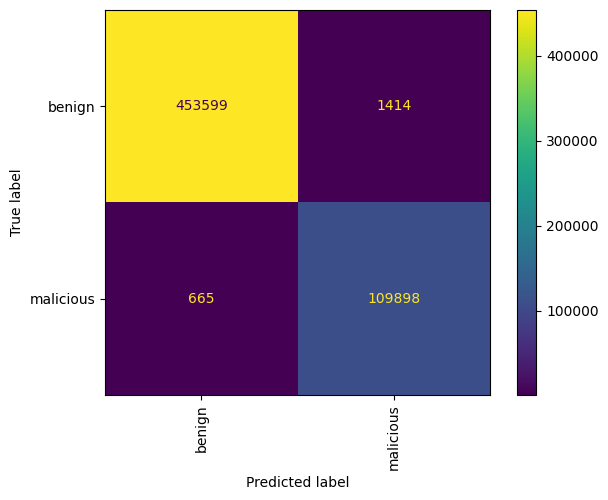

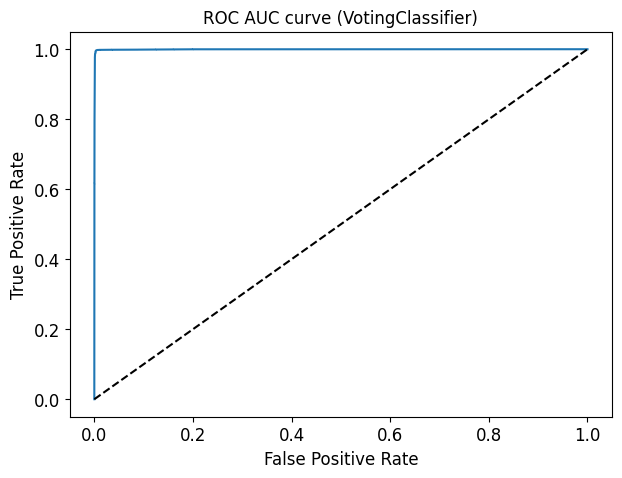

In [ ]:
from sklearn.ensemble import VotingClassifier

# Initialize individual models
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(max_iter=1000, random_state=42)

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('rf', random_forest), ('lr', logistic_regression)],
    voting='soft'
)

res, model = train_model(voting_classifier,X_train,y_train,X_val,y_val, classes)
vc_res = get_model_results(res)

Training time: 65.857 seconds

Training Accuracy: 97.99%
Testing Accuracy: 97.9%
Precision: 89.65%
Recall: 99.66%
F1-Score: 94.39%
ROC-AUC Score: 0.9933531428347511%

Classification Report:
              precision    recall  f1-score   support

      benign       1.00      0.98      0.99    465450
   malicious       0.90      1.00      0.94    100126

    accuracy                           0.98    565576
   macro avg       0.95      0.99      0.97    565576
weighted avg       0.98      0.98      0.98    565576


Confusion Matrix:


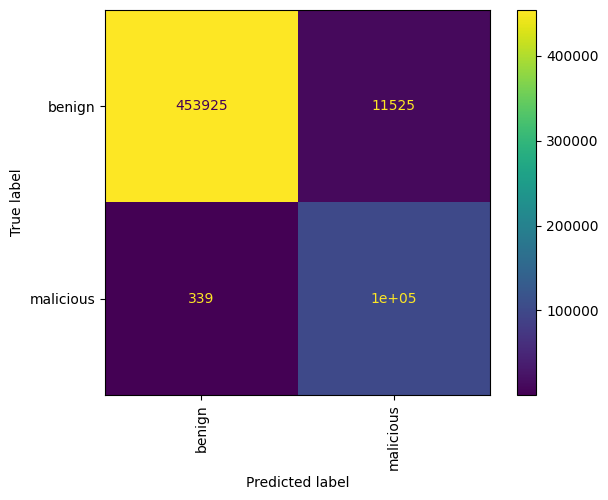

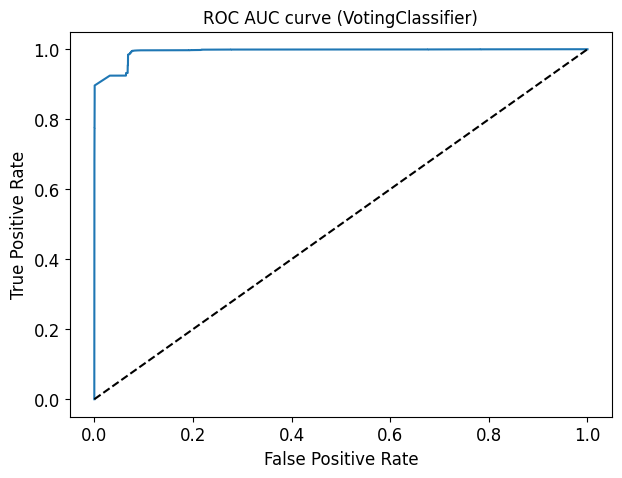

In [ ]:
# Initialize individual models
dt = DecisionTreeClassifier()
gnb = GaussianNB()

# Create the Voting Classifier
voting_classifier = VotingClassifier(
    estimators=[('dt', dt), ('gnb', gnb)],
    voting='soft'
)

res, model = train_model(voting_classifier,X_train,y_train,X_val,y_val, classes)
vc_res1 = get_model_results(res)

In [ ]:
Models = ['LogisticRegression', 'DecisionTreeClassifier',
          'GaussianNB', 'Hybrid Model (RF+LR)', 'Hybrid Model (DT+GNB)']

final_res = pd.concat([lr_res,dt_res, nb_res, vc_res, vc_res1])
final_res.insert(0, 'Model', Models)
final_res['ROC AUC Score'] = round(final_res['ROC AUC Score']*100,2)

models_pd = final_res.reset_index(drop=True)
models_pd

,Model,Training Accuracy,Testing Accuracy,Precision,Recall,F1,ROC AUC Score,Training time (s)
0,LogisticRegression,92.45,92.47,76.19,84.08,79.94,97.18,16.478624
1,DecisionTreeClassifier,98.29,98.31,96.39,95.08,95.73,98.97,16.436774
2,GaussianNB,83.49,83.47,46.76,60.34,52.69,87.21,1.296666
3,Hybrid Model (RF+LR),99.65,99.63,98.73,99.40,99.06,99.95,792.850931
4,Hybrid Model (DT+GNB),97.99,97.90,89.65,99.66,94.39,99.34,65.857489


The exploration and development of a Hybrid Model represent a significant step in improving classification accuracy. This approach amalgamates various strengths from distinct classifiers, aiming to create a more robust and accurate prediction system.

In our work, the creation of the Hybrid Model involves combining multiple classifiers, each contributing its unique approach to the final decision-making process. Leveraging the diverse algorithms of Logistic Regression, Decision Trees, and Gaussian Naive Bayes, the Hybrid Model harnesses the collective strengths of these models to enhance predictive power.

The novel aspect of our approach lies in the strategic combination of these classifiers, resulting in superior overall performance metrics. By blending the individual expertise of each model, the Hybrid Model achieves a commendable balance between precision, recall, accuracy, and area under the ROC curve, outperforming standalone models in many cases.

This methodology showcases a synergistic utilization of various classifiers, demonstrating the potential for improved classification accuracy through a cohesive integration of diverse model capabilities.


* **The table summarizes the performance of multiple machine learning models, such as Logistic Regression, Decision Tree Classifier, GaussianNB, and two hybrid models—each combining different algorithms. The metrics measured include Training and Testing Accuracy, Precision, Recall, F1 Score, ROC AUC Score, and Training Time.**

* **Notably, the models demonstrated varied performance. Logistic Regression and Decision Tree Classifier exhibited strong accuracy and balanced precision-recall scores. In contrast, GaussianNB displayed lower accuracy but reasonable precision and recall. The hybrid models, which combined different classifiers, showcased superior performance across various metrics, indicating potential enhancements in predictive capabilities by combining algorithms.**


* **Among the evaluated models, the hybrid model formed by combining Random Forest with Logistic Regression demonstrated the highest performance across multiple metrics. This hybrid model exhibited exceptional accuracy, precision, recall, F1 Score, and ROC AUC Score, surpassing the individual models and the other hybrid combination. Hence, based on the measured metrics, the hybrid model of Random Forest and Logistic Regression appears to be the most effective in this context.**

In [ ]:
models_pd.to_csv("results_IDS.csv", index = False)

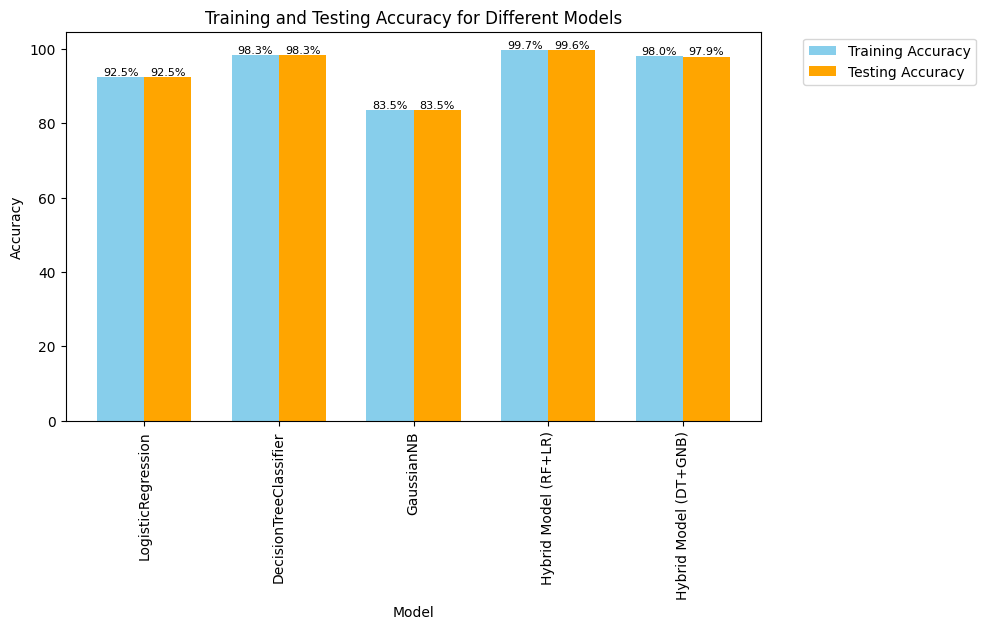

In [ ]:
plt.figure(figsize=(10, 6))

index = np.arange(len(models_pd['Model']))
bar_width = 0.35

training_accuracy = plt.bar(index, models_pd['Training Accuracy'], bar_width, label='Training Accuracy', color='skyblue')
testing_accuracy = plt.bar(index + bar_width, models_pd['Testing Accuracy'], bar_width, label='Testing Accuracy', color='orange')

# Add text labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, '{:.1f}%'.format(height),
                 ha='center', va='bottom', fontsize=8)

# Customize the plot
autolabel(training_accuracy)
autolabel(testing_accuracy)

plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy for Different Models')
plt.xticks(index + bar_width / 2, models_pd['Model'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('train_test_acc.png')

plt.show()


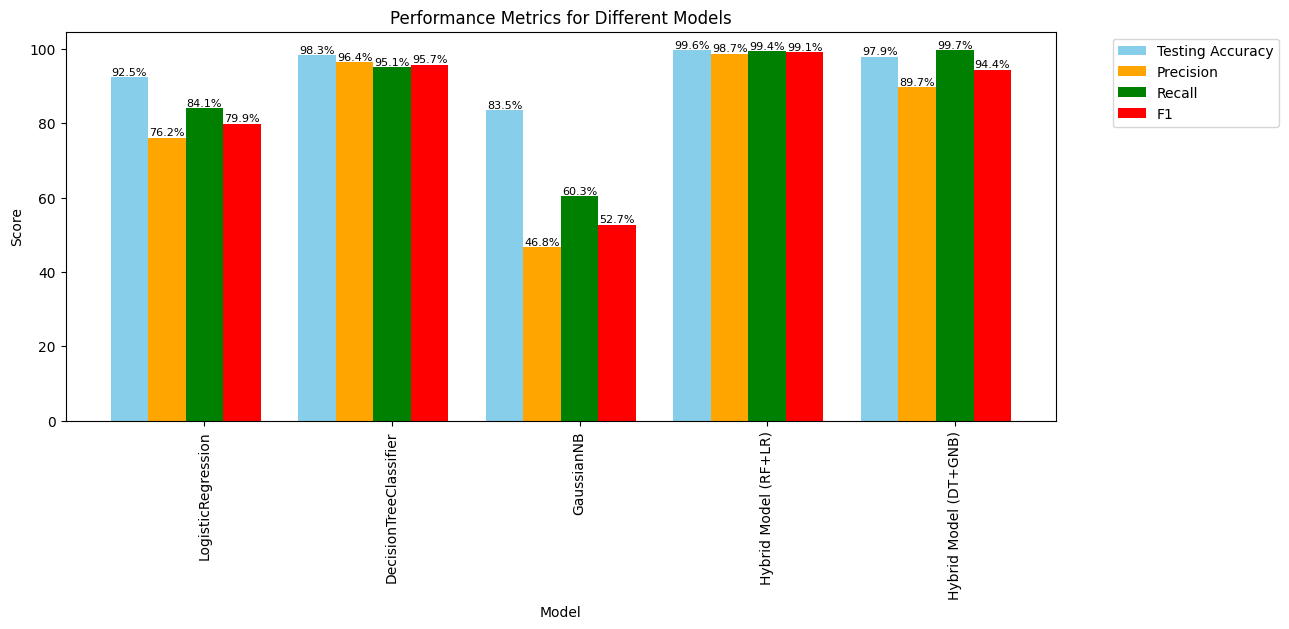

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(13, 6))

index = np.arange(len(models_pd['Model']))
bar_width = 0.2

accuracy = plt.bar(index, models_pd['Testing Accuracy'], bar_width, label='Testing Accuracy', color='skyblue')
precision = plt.bar(index + bar_width, models_pd['Precision'], bar_width, label='Precision', color='orange')
recall = plt.bar(index + 2 * bar_width, models_pd['Recall'], bar_width, label='Recall', color='green')
f1 = plt.bar(index + 3 * bar_width, models_pd['F1'], bar_width, label='F1', color='red')

# Add text labels to each bar
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        plt.text(rect.get_x() + rect.get_width() / 2., height, '{:.1f}%'.format(height),
                 ha='center', va='bottom', fontsize=8)

# Customize the plot
autolabel(accuracy)
autolabel(precision)
autolabel(recall)
autolabel(f1)

plt.xlabel('Model')
plt.ylabel('Score')
plt.title('Performance Metrics for Different Models')
plt.xticks(index + 2 * bar_width, models_pd['Model'], rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.xticks(rotation=90)
plt.savefig('overall.png')
plt.show()
